# Cálculo Numérico - 2021.2 - Tarefa 3 - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390
## Questões discutidas com: Beatriz Almeida Ramos, Carlos Bravo, Matheus Barroso

# Exercício 1.1

Para o exercício proposto, devemos aproximar $\sqrt{10}$ com o Método da Bissecção no intervalo $[0,20]$. Devemos também determinar quantos passos serão necessários caso seja necessário ter um erro máximo de $10^{-8}$. Para isto, devemos nos recordar que o erro do Método da Bissecção pode ser definido de duas formas.

Erro no domínio: $x_{f} \approx x_{c}$.

Erro no contradomínio: $f(x_{f}) \approx 0$

Usaremos o erro no domínio, pois vamos encontrar $x$ tal que $f(x) = 0$, sendo este $x$ o valor que queremos aproximar $\sqrt{10}$

Para realizarmos nossa aproximação, devemos determinar inicialmente uma função sobre a qual aplicaremos o Método da Bissecção. Para isto, podemos procurar uma função tal que $f(\sqrt{10}) = 0$. Trivialmente, podemos perceber que pode ser utilizada a função $f(x) = x^2 - 10$. Com isto, podemos fazer a aproximação do zero da função $f(x)$, que é o $\sqrt{10}$. Podemos então aplicar diretamente o algoritmo para fazer uma aproximação.


In [40]:
using LinearAlgebra

In [41]:
# Função auxiliar para verificar sinais opostos
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
    return f(a)*f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [42]:
# Método da Bissecção para aproximar raiz de 10 usando o polinômio x²-10 no intervalo [0,20]
# Como os intervalos não são raízes e já tem sinais opostos, não nos preocuparemos com isto
function bissecao_raiz_10(erro) 
    
    # Intervalo [0,20]
    a = 0 
    b = 20 
    f(x) = x^2-10 # Função x²-10
    tamanho_final_do_intervalo = 2*erro
    iteracoes = floor(log2((b-a)/tamanho_final_do_intervalo))+1
    
    for i=1:iteracoes
        m=(a+b)/2
        if f(m) == 0
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    x_final=(a+b)/2
    return x_final, iteracoes
end

bissecao_raiz_10 (generic function with 1 method)

Com isto, podemos fazer a chamada do método passando o tamanho máximo do erro que o usuário solicita, pois o tamanho do intervalo final define uma distância ao $x$ real. Com isto, podemos obter o número de iterações necessárias para que o erro seja, no máximo, $10^{-8}$.

In [43]:
bissecao_raiz_10(10^-8)

(3.162277666851878, 30.0)

Com isto, obtemos uma aproximação de $\sqrt{10} \approx 3.162277666851878$ onde foram necessários $30$ passos para obter um erro máximo de $10^{-8}$. 

# Exercício 1.2)

Para este exercício, faremos a implementação de 3 métodos. O primeiro método será responsável por nos indicar se as funções na bissecção tem sinais opostos. O segundo método é uma implementação genérica do Método de Newton, que receberá uma função, a derivada da função, a quantidade de iterações e o chute inicial como parâmetros, retornando assim uma aproximação do valor. O terceiro método será o Método da Bissecção, que receberá como parâmetro o polinômio de grau 5 e sua derivada. Esta última função realizará normalmente o cálculo através do Método da Bissecção deixando um intervalo de $10^{-2}$. Após isto, fará uma chamada para o Método de Newton passando como chute inicial essa aproximação e retornará esse valor final.

In [44]:
# Função auxiliar para verificar sinais opostos
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
    return f(a)*f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [45]:
# Método de Newton para a função f e f'
function metodo_newton(f, fd, iteracoes, chute) # Função f, f', número de iteracoes e chute inicial
    for i=1:iteracoes
        chute = chute - (f(chute))/(fd(chute)) # Chute - f(chute)/f'(chute)
    end
    return chute # Aproximação do resultado. Quanto mais iterações, maior a precisão.
end

metodo_newton (generic function with 1 method)

In [46]:
# Método da Bissecção para retornar uma raíz de um polinômio de grau 5 usando o Método da Bissecção e o Método de Newton.
function bissecao(f, fd) 
    
    # Intervalo [-100, 100]
    a = -100 
    b = 100
    tamanho_final_do_intervalo = 10^-2
    iteracoes = floor(log2((b-a)/tamanho_final_do_intervalo))+1
    
    if !(tem_sinais_opostos(f,a,b)) # Verificação de sinais opostos
        return "Não tem sinais opostos"
    end
    
    for i=1:iteracoes
        m=(a+b)/2
        if f(m) == 0
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    chute=(a+b)/2
    x_final = metodo_newton(f, fd, 20, chute)
    return x_final
end

bissecao (generic function with 1 method)

Com isto, realizaremos uso do Método da Bissecção em conjunto com o Método de Newton para calcular uma das raízes de $f(x) = x^{5}-25$. Este método deve então nos dar uma aproximação de $\sqrt[5]{25}$.

In [47]:
f(x) = x^5-25
fd(x) = 5x^4
bissecao(f, fd)

1.9036539387158784

# Exercício 1.3)

Para este exercício, devemos escolher um dos métodos proposto e fazer uma aproximação de $ln(3)$. Usaremos o Método da Bissecção para realizar o cálculo. Devemos garantir também um intervalo menor que $10^{-3}$

Para obtermos a aproximação, podemos utilizar uma aproximação pelo domínio, procurando alguma função tal que $f(ln(3)) = 0$. Para isto, como sabemos calcular $e^{x}$ para qualquer $x$ e sabemos as propriedades de $ln$, podemos utilizar a função $f(x) = 3 - e^{x}$, pois assim procuraremos no domínio da função o valor da raíz $ln(3)$, obtendo uma aproximação desta.

Para isto, construiremos primeiro o método auxiliar de sinais apostos. Após insto, faremos o Método da Bissecção para o caso proposto, utilizando o intervalo $[-5,5]$.

In [48]:
# Função auxiliar para verificar sinais opostos
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
    return f(a)*f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [49]:
# Método da Bissecção para aproximar ln(3) usando a função 3 - exp(x) no intervalo [-5,5]
# Como os intervalos não são raízes e já tem sinais opostos, não nos preocuparemos com isto
function bissecao_ln_3(tamanho_final_do_intervalo) 
    
    # Intervalo [-5,5]
    a = -5
    b = 5 
    f(x) = 3 - exp(x) # Função 3-exp(x)
    iteracoes = floor(log2((b-a)/tamanho_final_do_intervalo))+1
    
    for i=1:iteracoes
        m=(a+b)/2
        if f(m) == 0
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    x_final=(a+b)/2
    return x_final
end

bissecao_ln_3 (generic function with 1 method)

Com isto, podemos utilizar a função do Método da Bissecção criado para este caso passando um tamanho de intervalo menor que $10^{-3}$ para nos dar uma aproximação de $ln(3)$

In [50]:
bissecao_ln_3(10^-4)

1.0985946655273438

# Exercício 1.4)

Para o exercício proposto, devemos obter uma aproximação de $cos(40)$ utilizando o método da interpolação polinomial. Utilizaremos então um conjunto de pontos afim de montar o sistema de equações que resultará na matriz de Vandermonde para encontrarmos uma função aproximada que nos dará o valor de $cos(40)$.

Vamos utilizar apenas os valores entre cos(30) e cos(60), pois assim podemos tirar uma aproximação da função trigonométrica próxima de um polinômio de grau 2 utilizando valores já conhecidos, isto é, cos(30), cos(45) e cos(60). Com isto, teremos uma função que passa pelos pontos $(x_{1},y_{1}),(x_{2},y_{2}),(x_{3},y_{3})$ e que nos dará um polinômio na forma 
$$P = c_{2}x^2 + c_{1}x + c_{0}$$

Com isto, podemos montar o seguinte sistema de equações

$$
\begin{cases}
c_{2}x_{0}^2 + c_{1}x_{0} + c_{0} = y_{0} \\
c_{2}x_{1}^2 + c_{1}x_{1} + c_{0} = y_{1} \\
c_{2}x_{2}^2 + c_{1}x_{2} + c_{0} = y_{2} \\
\end{cases}
$$

Usaremos então os pontos $(30,\dfrac{\sqrt{3}}{2}),(45,\dfrac{\sqrt{2}}{2}),(60, \dfrac{1}{2})$. Portanto, temos que 

\begin{cases}
c_{2}30^2 + c_{1}30 + c_{0} = \dfrac{\sqrt{3}}{2} \\
c_{2}45^2 + c_{1}45 + c_{0} = \dfrac{\sqrt{2}}{2} \\
c_{2}60^2 + c_{1}60 + c_{0} = \dfrac{1}{2} \\
\end{cases}

Com isto, podemos modelar as matrizes da seguinte forma


$$
V = \begin{bmatrix}
1 & 30 & 30^2 \\
1 & 45 & 45^2 \\
1 & 60 & 60^2 \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
\dfrac{\sqrt{3}}{2} \\
\dfrac{\sqrt{2}}{2} \\
\dfrac{1}{2} \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
c_{2} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao_cosseno_40 descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 2.



In [51]:
function interpolacao_cosseno()
    # Cria a matriz V
    x = [deg2rad(30);deg2rad(45);deg2rad(60)]
    y = [cos(deg2rad(30)); cos(deg2rad(45)); cos(deg2rad(60))]
    V=[x.^0 x.^1 x.^2]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_cosseno (generic function with 1 method)

Com isto, podemos utilizar o método para achar os coeficientes da polinômio de grau 2 que nos dá uma aproximação da função original. Podemos então armazenar esses coeficientes, montar a função quadrática e calcular uma aproximação de cos(40) a partir desta função.

In [52]:
coefs = interpolacao_cosseno()
c2 = coefs[3]
c1 = coefs[2]
c0 = coefs[1]
f(x) = c2*(x^2) + c1*x + c0
f(deg2rad(40))

0.7654338952290287

# Exercício 1.5)

Para este exercício, devemos descobrir o horário ou uma interpolação do horário em que houve um assassinato. De acordo com a descrição, as tempratura registradas foram

#### 15h00: 34ºC
#### 16h30: 30ºC
#### 17h30: 25ºC

Utilizando interpolação polinomial, podemos gerar uma aproximação de uma função que represente o caso descrito utilizando os pontos $(15,34)$,$(16.5,30)$,$(17.5,25)$, pois correlacionam cada hora com uma temperatura registrada. Com isto, temos vamos ter na saída um polinômio na forma

$$P = c_{2}x^2 + c_{1}x + c_{0}$$

Podemos então montar o seguinte sistema de equações

Com isto, podemos montar o seguinte sistema de equações

$$
\begin{cases}
c_{2}x_{0}^2 + c_{1}x_{0} + c_{0} = y_{0} \\
c_{2}x_{1}^2 + c_{1}x_{1} + c_{0} = y_{1} \\
c_{2}x_{2}^2 + c_{1}x_{2} + c_{0} = y_{2} \\
\end{cases}
$$

Com isto, podemos modelar as matrizes da seguinte forma

$$
V = \begin{bmatrix}
1 & 15 & 15^2 \\
1 & 16.5 & 16.5^2 \\
1 & 17.5 & 17.5^2 \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
34 \\
30 \\
25 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
c_{2} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao_crime descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 2.

In [53]:
function interpolacao_crime()
    # Cria a matriz V
    x = [15; 16.5; 17.5]
    y = [34; 30; 25]
    V=[x.^0 x.^1 x.^2]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_crime (generic function with 1 method)

Com isto, podemos gerar uma função polinomial e um tempo aproximado do horário da morte.

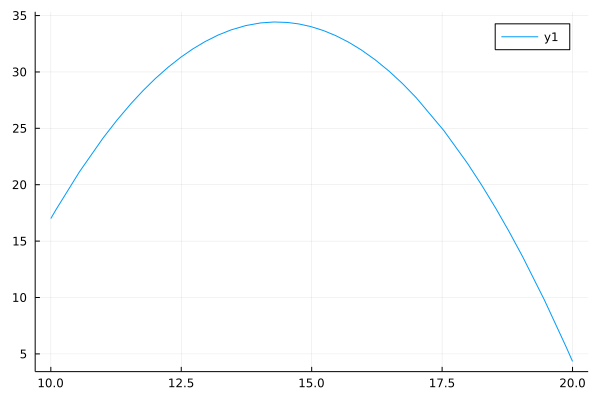

In [54]:
using Plots
coefs = interpolacao_crime()
c2 = coefs[3]
c1 = coefs[2]
c0 = coefs[1]
f(x) = c2*(x^2) + c1*x + c0
plot(f, 10,20)

Com isto, apesar de não obtermos a temperatura de 37°C, a função quadrática passa pelos pontos fornecidos, nos indicando a taxa de variação com que a temperatura cai. Com isto, podemos ter uma boa aproximação do horário de morte se acharmos o ponto máximo da função. Para isso, podemos utilizar o método da bissecção para acharmos a raíz da derivada da função gerada.

In [55]:
# Função auxiliar para verificar sinais opostos
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
    return f(a)*f(b) < 0
end

# Método da Bissecção para aproximar a raiz da função derivada da função interpolada pela cena do crime no intervalo [15,40]
function bisseccao_crime(tamanho_final_do_intervalo, c1,c2) 
    
    # Intervalo [15,40]
    a = 0
    b = 40
    f(x) = (2*c2)*x + c1
    iteracoes = floor(log2((b-a)/tamanho_final_do_intervalo))+1
    
    for i=1:iteracoes
        m=(a+b)/2
        if f(m) == 0
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    x_final=(a+b)/2
    return x_final
end

bisseccao_crime (generic function with 2 methods)

Com isto, podemos procurar na derivada da função quadrática encontrada sua raiz, indicando o ponto em que a temperatura do corpo começou a decair, sendo o horário mais provável do seu assassinato.

In [56]:
using Plots
coefs = interpolacao_crime()
c2 = coefs[3]
c1 = coefs[2]
c0 = coefs[1]
bisseccao_crime(10^-8,c1,c2)


14.321428569965065

Com isto, temos que o provável horário do assassinato foi $14h18$~$14h20$.

# Exercício 1.6)

# Exercício 1.7)

Para este exercício, devemos realizar uma interpolação por partes dados 5 pontos {$(x_{0},y_{0}),(x_{1},y_{1}),(x_{2},y_{2}),(x_{3},y_{3}),(x_{4},y_{4})$}, produzindo na saída um polinômio de grau 3 sem bicos ( definição ).

Com isto, temos dois polinômios, P e Q, na forma

$$P = c_{3}x^3 + c_{2}x^2 + c_{1}x + c_{0}$$
$$Q = d_{3}x^3 + d_{2}x^2 + d_{1}x + d_{0}$$

que devem ser interpolados.

Podemos então montar inicialmente o seguinte sistema de equações

$$
\begin{cases}
P(x_{0}) = y_{0} \\
P(x_{1}) = y_{1} \\
P(x_{2}) = y_{2} \\
Q(x_{2}) = y_{2} \\
Q(x_{3}) = y_{3} \\
Q(x_{4}) = y_{4} \\
\end{cases}
$$

Como este sistema possui 8 variáveis $(c_{0},c_{1},c_{2},c_{3},d_{0},d_{1},d_{2},d_{3},)$ e apenas 6 equações, devemos introduzir mais 2 equações para que o sistema possa ser resolvido. Vamos introduzir 2 variáveis: uma relativa à derivada de $P$ e $Q$ em $x_{2}$, para que o ponto de encontro das funções tenham a mesma inclinação, e a segunda relativa a segunda derivada com a finalidade de terem a mesma curvatura em $x_{2}$.

Com isto, temos que

$$
\begin{cases}
P(x_{0}) = y_{0} \\
P(x_{1}) = y_{1} \\
P(x_{2}) = y_{2} \\
Q(x_{2}) = y_{2} \\
Q(x_{3}) = y_{3} \\
Q(x_{4}) = y_{4} \\
P'(x_{2}) = Q'(x_{2}) \\
P''(x_{2}) = Q''(x_{2})
\end{cases}
$$

Utilizando os pontos em questão, podemos modelar as matrizes para resolver o sistema da seguinte forma

$$
V = \begin{bmatrix}
1 & x_{0} & x_{0}^2 & x_{0}^3 & 0 & 0 & 0 & 0 \\
1 & x_{1} & x_{1}^2 & x_{1}^3 & 0 & 0 & 0 & 0 \\
1 & x_{2} & x_{2}^2 & x_{2}^3 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & x_{2} & x_{2}^2 & x_{2}^3 \\
0 & 0 & 0 & 0 & 1 & x_{3} & x_{3}^2 & x_{3}^3 \\
0 & 0 & 0 & 0 & 1 & x_{4} & x_{4}^2 & x_{4}^3 \\
0 & 1 & 2x_{2} & 3x_{2}^2 & 0 & -1 & -2x_{2} & -3x_{2}^2  \\
0 & 0 & 2 & 6x_{2} & 0 & 0 & -2 & -6x_{2}  \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
y_{2} \\
y_{3} \\
y_{4} \\
0 \\
0 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
c_{2} \\
c_{3} \\
d_{0} \\
d_{1} \\
d_{2} \\
d_{3} \\
\end{bmatrix}
$$


In [57]:
function interpolacao_por_partes_cubica(x::Array{Int64},y::Array{Int64})
    # Cria a matriz V
    V = [1 x[1] x[1]^2 x[1]^3 0 0 0 0; 1 x[2] x[2]^2 x[2]^3 0 0 0 0; 1 x[3] x[3]^2 x[3]^3 0 0 0 0; 0 0 0 0 1 x[3] x[3]^2 x[3]^3; 0 0 0 0 1 x[4] x[4]^2 x[4]^3; 0 0 0 0 1 x[5] x[5]^2 x[5]^3; 0 1 2x[3] 3x[3]^2 0 -1 -2x[3] -3x[3]^2; 0 0 2 6x[3] 0 0 -2 -6x[3]]
    y = [y[1]; y[2]; y[3]; y[3]; y[4]; y[5]; 0; 0]
    c=V\y # Resolve o sistema linear Vc=y

    return c # Vetor de coeficientes
end

interpolacao_por_partes_cubica (generic function with 1 method)

Com os coeficientes, podemos então plotar as funções encontradas respectivamente em [0,2] e [2,4] para observação ambas as interpolações conectadas.

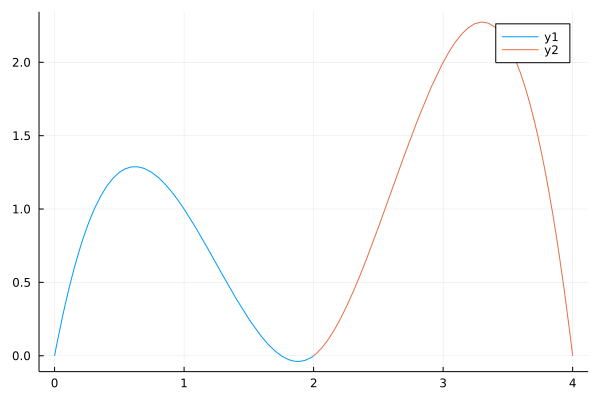

In [58]:
using Plots

x = [0,1,2,3,4]
y = [0,1,0,2,0]
c = interpolacao_por_partes_cubica(x,y)
f(x) = (c[4] * x^3)+(c[3] * x^2)+(c[2] * x)+(c[1])
g(x) = (c[8] * x^3)+(c[7] * x^2)+(c[6] * x)+(c[5])
plot(f, 0, 2)
plot!(g, 2, 4)